In [1]:
import numpy as np
from dipy.data import get_fnames
from dipy.align.imwarp import SymmetricDiffeomorphicRegistration
from dipy.align.metrics import SSDMetric, CCMetric, EMMetric
import dipy.align.imwarp as imwarp
from dipy.viz import regtools


fname_moving = get_fnames('reg_o')
fname_static = get_fnames('reg_c')

moving = np.load(fname_moving)
static = np.load(fname_static)

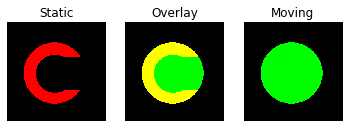

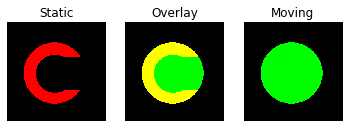

In [2]:
regtools.overlay_images(static, moving, 'Static', 'Overlay', 'Moving', 'input_images.png')

In [3]:
dim = static.ndim
metric = SSDMetric(dim)

In [4]:
level_iters = [200, 100, 50, 25]
sdr = SymmetricDiffeomorphicRegistration(metric, level_iters, inv_iter = 50)

In [5]:
mapping = sdr.optimize(static, moving)

Creating scale space from the moving image. Levels: 4. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 4. Sigma factor: 0.200000.
Optimizing level 3
Optimizing level 2
Optimizing level 1
Optimizing level 0


(array([[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     , 127.     , 127.00001, ...,   0.     , 127.     ,
         127.     ],
        [  0.     , 127.00001, 127.     , ...,   0.     , 127.     ,
         127.     ],
        ...,
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     , 127.     , 127.     , ...,   0.     , 127.     ,
         127.     ],
        [  0.     , 127.     , 127.     , ...,   0.     , 127.     ,
         127.     ]], dtype=float32),
 array([[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     , 126.87221, 126.88522, ...,   0.     , 127.     ,
         127.     ],
        [  0.     , 126.86069, 127.     , ...,   0.     , 127.     ,
         127.     ],
        ...,
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     , 127.     , 127.     , ...,   0.     ,

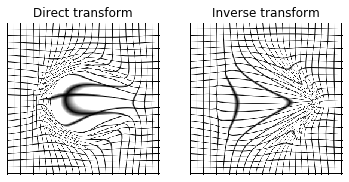

In [6]:
regtools.plot_2d_diffeomorphic_map(mapping, 10, 'diffeomorphic_map.png')

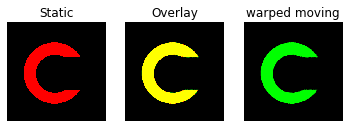

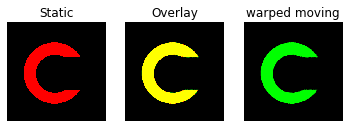

In [7]:
warped_moving = mapping.transform(moving, 'linear')
regtools.overlay_images(static, warped_moving, 'Static', 'Overlay', 'warped moving', 'direct_warp_result.png')

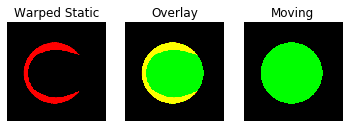

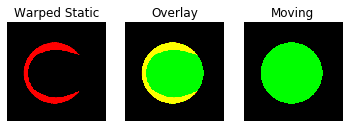

In [8]:
warped_static = mapping.transform(static, 'linear')
regtools.overlay_images(warped_static, moving, 'Warped Static', 'Overlay', 'Moving', 'inverse_warp_result.png')

In [9]:
def callback_cc(sdr, status):
    if status == imwarp.RegistrationStages.SCALE_END:
        wmoving = sdr.metric.moving_image
        wstatic = sdr.metric.static_image
        regtools.overlay_images(wmoving, wstatic, 'Warped Moving', 'Overlay', 'Warped Static')

In [10]:
from dipy.data.fetcher import fetch_syn_data, read_syn_data
from dipy.segment.mask import median_otsu

fetch_syn_data()
t1, b0 = read_syn_data()
data = np.array(b0.get_data(), dtype=np.float64)

Data size is approximately 12MB
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/jdrussell3/.dipy/syn_test 
Data size is approximately 12MB
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/jdrussell3/.dipy/syn_test 


In [11]:
b0_masked, mask = median_otsu(data, median_radius=4, numpass=4)

In [13]:
static = b0_masked[:,:,40]
moving = b0_masked[:,:,38]

In [14]:
sigma_diff = 30
radius = 4
metric = CCMetric(2, sigma_diff, radius)

In [15]:
level_iters = [100, 50, 25]
sdr = SymmetricDiffeomorphicRegistration(metric, level_iters)
sdr.callback = callback_cc

Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
Optimizing level 2
Optimizing level 1
Optimizing level 0


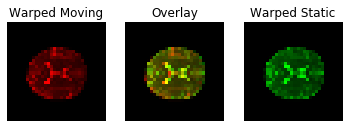

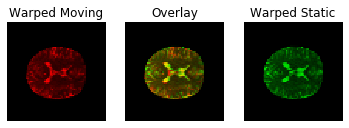

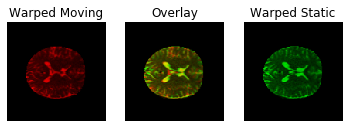

In [16]:
mapping = sdr.optimize(static, moving)

In [17]:
warped = mapping.transform(moving)

In [ ]:
regtools.overlay